# **Load all the required libraries**

In [ ]:
from keras.layers import Dense, Input, Flatten, Lambda, Dropout
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras.optimizers
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2

# **Set the Path to Dataset** 

The format for dataset is in the following manner: 

/dataset/train/classes

/dataset/test/classes 

Here the dataset is splitted as 90/10 for trainig and testing as the training test is quite small

In [ ]:
#train_path = '/content/drive/MyDrive/CBIS Dataset for Benign and Malignent/train'
#test_path = '/content/drive/MyDrive/CBIS Dataset for Benign and Malignent/test'
train_path = '/content/drive/MyDrive/ModifiedDatatsetofBreastCancer/train'
test_path = '/content/drive/MyDrive/ModifiedDatatsetofBreastCancer/test'

# **Load the dataset**

Load path of all the images present inside the folder

In [ ]:
image_files = glob(train_path + '/*/*.png')
test_files = glob(test_path + '/*/*.png')

400


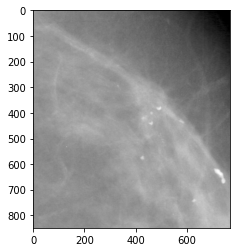

In [ ]:
print(len(test_files))
img = cv2.imread(image_files[0])
plt.imshow(img)
plt.show()

# **Load the pre-trained model**

Load the pre-trained model of VGG19 that is previously trained on ImageNet Dataset

In [ ]:
vgg = VGG19(include_top=False,input_shape=[224,224,3])

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

# **Seeting attributes of VGG19 architecture**

Here as we are using two classes so the dense layer will be having two outputs
Dropout is set to 0.2 and can be changed according to the requirement

In [ ]:
x = Flatten()(vgg.output)
x = Dense(64,activation='relu')(x)
x = Dropout(0.2)(x)
prediction = Dense(2,activation='softmax')(x)


# **Intialize the model**

In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

# **Display the model attributes**

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile('adam','categorical_crossentropy',metrics=['accuracy'])

# **Generate the and normalize the Image dataset**

In [ ]:
gen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_gen = gen.flow_from_directory(test_path, target_size=(224,224))
print(test_gen.class_indices)
labels = [None]*len(test_gen.class_indices)
for k,v in test_gen.class_indices.items():
    labels[v] = k

Found 400 images belonging to 2 classes.
{'Calcification': 0, 'Masses': 1}


min: 0.0 max 0.9960785


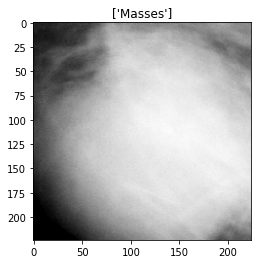

In [ ]:
for x,y in test_gen:
    print("min:",x[0].min(),"max",x[0].max())
    plt.title([labels[np.argmax(y[0])]])
    plt.imshow(x[0])
    plt.show()
    break

In [ ]:
train_gen = gen.flow_from_directory(train_path, target_size=(224,224))

Found 2720 images belonging to 2 classes.


# **Start Training Process**

Batch size is set to 32
iterated on 30-50 epochs

In [ ]:
batch_size = 32
r = model.fit_generator(train_gen,validation_data=test_gen,
                        epochs=30, steps_per_epoch=len(image_files)//batch_size,
                        validation_steps=len(test_files)//batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/30
85/85 [==============================] - 428s 5s/step - loss: 0.8144 - accuracy: 0.6129 - val_loss: 0.6053 - val_accuracy: 0.6771
Epoch 2/30
85/85 [==============================] - 33s 391ms/step - loss: 0.6012 - accuracy: 0.6467 - val_loss: 0.5971 - val_accuracy: 0.6589
Epoch 3/30
85/85 [==============================] - 33s 390ms/step - loss: 0.5637 - accuracy: 0.6842 - val_loss: 0.5632 - val_accuracy: 0.7474
Epoch 4/30
85/85 [==============================] - 33s 389ms/step - loss: 0.5465 - accuracy: 0.6985 - val_loss: 0.5600 - val_accuracy: 0.6953
Epoch 5/30
85/85 [==============================] - 33s 390ms/step - loss: 0.5263 - accuracy: 0.7154 - val_loss: 0.5241 - val_accuracy: 0.7526
Epoch 6/30
85/85 [==============================] - 33s 389ms/step - loss: 0.5218 - accuracy: 0.7154 - val_loss: 0.5114 - val_accuracy: 0.7786
Epoch 7/30
85/85 [==============================] - 33s 389ms/step - loss: 0.5027 - accuracy: 0.7162 - val_loss: 0.4974 - val_accuracy: 0.7734
E

# **Evaluate the model**

In [ ]:
model.evaluate_generator(test_gen)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.47949209809303284, 0.8025000095367432]

In [ ]:
model.evaluate_generator(train_gen)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.3195573389530182, 0.862500011920929]

# **Save the model of 1st Phase**

In [ ]:
model.save('/content/drive/MyDrive/vgg19_model.h5')

# **Get Confusion Matrix**

In [ ]:
def get_confusion_matrix(data_path, N):
    print('generating confusion_matrix')
    predictions = []
    targets = []
    for x,y in gen.flow_from_directory(data_path, target_size=(224,224),shuffle=False):
        p = model.predict(x)
        p = np.argmax(p, axis = 1)
        y = np.argmax(y, axis = 1)
        predictions = np.concatenate((predictions,p))
        targets = np.concatenate((targets, y))
        if len(targets)>=N:
            break
    cm = confusion_matrix(targets, predictions)
    return cm

In [ ]:
cm = get_confusion_matrix(train_path, len(image_files))
print(cm)

generating confusion_matrix
Found 2720 images belonging to 2 classes.
[[1088  218]
 [ 156 1258]]


In [ ]:
valid_cm = get_confusion_matrix(test_path, len(test_files))
print(valid_cm)

generating confusion_matrix
Found 400 images belonging to 2 classes.
[[148  52]
 [ 27 173]]


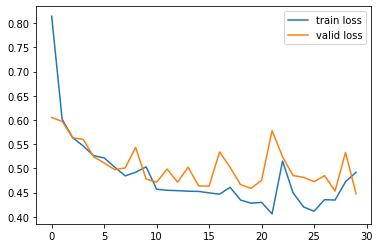

In [ ]:
plt.plot(r.history['loss'],label = 'train loss')
plt.plot(r.history['val_loss'],label = 'valid loss')
plt.legend()
plt.show()

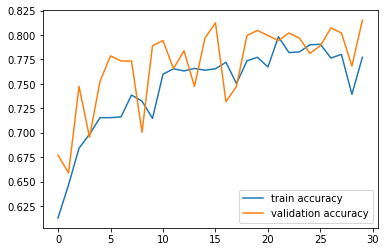

In [ ]:
plt.plot(r.history['accuracy'], label = 'train accuracy')
plt.plot(r.history['val_accuracy'], label ='validation accuracy')
plt.legend()
plt.show()

# **INBreast**


In [ ]:
train_path = '/content/drive/MyDrive/INBreast Dataset for Benign and Malignent/train'
test_path = '/content/drive/MyDrive/INBreast Dataset for Benign and Malignent/test'

In [ ]:
image_files = glob(train_path + '/*/*.png')
test_files = glob(test_path + '/*/*.png')

In [ ]:
vgg = VGG19(include_top=False,input_shape=[224,224,3])

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)
x = Dense(64,activation='relu')(x)
x = Dropout(0.2)(x)
prediction = Dense(3,activation='softmax')(x)

In [ ]:
#model_prev = keras.models.load_model('/content/drive/MyDrive/vgg19_model_ben_mal.h5')
model_prev = keras.models.load_model('/content/drive/MyDrive/vgg19_model.h5')

In [ ]:
model_prev.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model_prev.compile('adam','categorical_crossentropy',metrics=['accuracy'])

In [ ]:
gen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_gen = gen.flow_from_directory(test_path, target_size=(224,224))
print(test_gen.class_indices)
labels = [None]*len(test_gen.class_indices)
for k,v in test_gen.class_indices.items():
    labels[v] = k

Found 34 images belonging to 2 classes.
{'Benign': 0, 'Malignant': 1}


min: 0.0 max 0.7960785


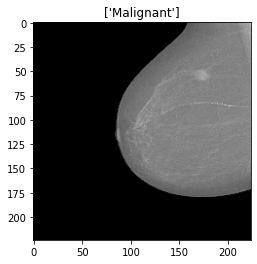

In [ ]:
for x,y in test_gen:
    print("min:",x[0].min(),"max",x[0].max())
    plt.title([labels[np.argmax(y[0])]])
    plt.imshow(x[0])
    plt.show()
    break

In [ ]:
train_gen = gen.flow_from_directory(train_path, target_size=(224,224))

Found 309 images belonging to 2 classes.


In [ ]:
batch_size = 64
r = model_prev.fit_generator(train_gen,validation_data=test_gen,
                        epochs=30, steps_per_epoch=len(image_files)//batch_size,
                        validation_steps=len(test_files)//batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/30
4/4 [==============================] - 23s 5s/step - loss: 4.7193 - accuracy: 0.5391
Epoch 2/30
4/4 [==============================] - 16s 4s/step - loss: 2.4952 - accuracy: 0.5214
Epoch 3/30
4/4 [==============================] - 13s 3s/step - loss: 1.4660 - accuracy: 0.6410
Epoch 4/30
4/4 [==============================] - 13s 3s/step - loss: 0.8706 - accuracy: 0.6484
Epoch 5/30
4/4 [==============================] - 10s 3s/step - loss: 0.6233 - accuracy: 0.6239
Epoch 6/30
4/4 [==============================] - 12s 3s/step - loss: 0.5846 - accuracy: 0.6797
Epoch 7/30
4/4 [==============================] - 11s 3s/step - loss: 0.5587 - accuracy: 0.6719
Epoch 8/30
4/4 [==============================] - 10s 3s/step - loss: 0.6313 - accuracy: 0.5556
Epoch 9/30
4/4 [==============================] - 12s 3s/step - loss: 0.5953 - accuracy: 0.6719
Epoch 10/30
4/4 [==============================] - 12s 3s/step - loss: 0.5735 - accuracy: 0.7031
Epoch 11/30
4/4 [======================

In [ ]:
model_prev.save('/content/drive/MyDrive/vgg19_model_final.h5')

In [ ]:
def get_confusion_matrix(data_path, N):
    print('generating confusion_matrix')
    predictions = []
    targets = []
    for x,y in gen.flow_from_directory(data_path, target_size=(224,224),shuffle=False):
        p = model_prev.predict(x)
        p = np.argmax(p, axis = 1)
        y = np.argmax(y, axis = 1)
        predictions = np.concatenate((predictions,p))
        targets = np.concatenate((targets, y))
        if len(targets)>=N:
            break
    cm = confusion_matrix(targets, predictions)
    return cm

In [ ]:
cm = get_confusion_matrix(train_path, len(image_files))
print(cm)

generating confusion_matrix
Found 309 images belonging to 2 classes.
[[219   0]
 [ 84   6]]


In [ ]:
valid_cm = get_confusion_matrix(test_path, len(test_files))
print(valid_cm)

generating confusion_matrix
Found 34 images belonging to 2 classes.
[[24  0]
 [10  0]]


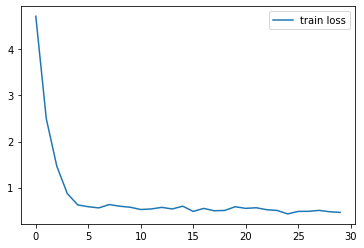

In [ ]:
plt.plot(r.history['loss'],label = 'train loss')
#plt.plot(r.history['val_loss'],label = 'validation loss')
plt.legend()
plt.show()

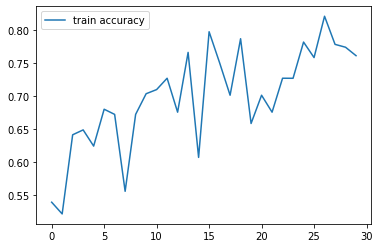

In [ ]:
plt.plot(r.history['accuracy'], label = 'train accuracy')
#plt.plot(r.history['val_accuracy'], label ='validation accuracy')
plt.legend()
plt.show()